In [ ]:
#!pip install gensim
#!pip install textblob
from gensim.models import LsiModel
import pandas as pd
import nltk
import requests
import numpy as np
import regex as re
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import pprint

In [51]:
# Specify the query and number of returns
parameters = {
    'q': 'Trump', # query phrase
    'pageSize': 20,  # maximum is 100
    'apiKey': '57fc36e6f65f4f0693d43ab41b09161c' 
}

In [52]:
# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

titles = [i['title'] for i in response_json['articles']]
text_combined = ' '.join(titles)


{'articles': [{'author': 'Mack DeGeurin',
               'publishedAt': '2023-03-17T14:26:00Z',
               'source': {'Id': None, 'Name': 'Gizmodo.com'},
               'title': 'YouTube Is Bringing Trump Back Online',
               'url': 'https://gizmodo.com/youtube-donald-trump-channel-reinstated-1850052899'},
              {'author': '',
               'publishedAt': '2023-03-30T22:44:18Z',
               'source': {'Id': 'cnn', 'Name': 'CNN'},
               'title': 'In pictures: Former President Trump',
               'url': 'https://www.cnn.com/2021/01/08/politics/gallery/donald-trump/index.html'},
              {'author': 'Lauren Fox',
               'publishedAt': '2023-03-30T23:46:06Z',
               'source': {'Id': 'cnn', 'Name': 'CNN'},
               'title': 'Republican leaders and Trump loyalists on Capitol '
                        'Hill rally behind the former president after '
                        'indictment',
               'url': 'https://www.cnn.com/202

In [39]:
#print(text_combined)

# save the text to a file
""" 
with open('titles2.txt', 'w') as f:
    f.write(text_combined)
 """

In [77]:
# Remove stop words

filtered_sentence=[]
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
for w in word_tokenize(text_combined):
    if w not in stop_words:
        filtered_sentence.append(w)      
print(filtered_sentence)

frequency_dist = nltk.FreqDist(filtered_sentence)
frequency_dist

['YouTube', 'Is', 'Bringing', 'Trump', 'Back', 'Online', 'In', 'pictures', ':', 'Former', 'President', 'Trump', 'Republican', 'leaders', 'Trump', 'loyalists', 'Capitol', 'Hill', 'rally', 'behind', 'former', 'president', 'indictment', 'Ex-CFO', 'Trump', 'Org', '.', 'switches', 'attorneys', 'amid', 'ongoing', 'investigations', "'Trump", 'bust', "'", '-', 'grassroots', 'Republicans', 'still', 'loyal', "'God", ',', 'guns', 'Trump', "'", ':', 'Thousands', 'turn', 'Texas', 'rally', 'Biden', ',', 'DOJ', 'wo', "n't", 'assert', 'privilege', 'Trump', 'deposition', 'suit', 'brought', 'fired', 'FBI', 'official', 'Opinion', ':', 'The', 'political', 'tightrope', 'Trump', "'s", 'Republican', 'rivals', 'must', 'walk', 'Manhattan', 'DA', "'s", 'office', 'slams', 'House', 'GOP', "'s", 'efforts', 'investigate', 'Trump', 'probe', ',', 'says', 'aprox', '.', '$', '5k', 'federal', 'funds', 'used', 'House', 'GOP', 'requests', 'Manhattan', 'DA', "'s", 'testimony', 'seek', 'discredit', 'investigation', 'Trump',

FreqDist({'Trump': 19, "'s": 8, ':': 6, ',': 6, 'indictment': 3, '.': 3, 'House': 3, 'GOP': 3, 'Donald': 3, 'Republican': 2, ...})

In [78]:
large_words=dict([k,v]for k,v in frequency_dist.items() if len(k)>3)
large_words

{'YouTube': 1,
 'Bringing': 1,
 'Trump': 19,
 'Back': 1,
 'Online': 1,
 'pictures': 1,
 'Former': 1,
 'President': 1,
 'Republican': 2,
 'leaders': 1,
 'loyalists': 1,
 'Capitol': 1,
 'Hill': 1,
 'rally': 2,
 'behind': 1,
 'former': 1,
 'president': 1,
 'indictment': 3,
 'Ex-CFO': 1,
 'switches': 1,
 'attorneys': 1,
 'amid': 1,
 'ongoing': 1,
 'investigations': 1,
 "'Trump": 1,
 'bust': 1,
 'grassroots': 1,
 'Republicans': 1,
 'still': 1,
 'loyal': 1,
 "'God": 1,
 'guns': 1,
 'Thousands': 1,
 'turn': 1,
 'Texas': 2,
 'Biden': 1,
 'assert': 1,
 'privilege': 1,
 'deposition': 1,
 'suit': 1,
 'brought': 1,
 'fired': 1,
 'official': 1,
 'Opinion': 1,
 'political': 2,
 'tightrope': 1,
 'rivals': 1,
 'must': 1,
 'walk': 1,
 'Manhattan': 2,
 'office': 1,
 'slams': 1,
 'House': 3,
 'efforts': 1,
 'investigate': 1,
 'probe': 2,
 'says': 1,
 'aprox': 1,
 'federal': 1,
 'funds': 1,
 'used': 1,
 'requests': 1,
 'testimony': 1,
 'seek': 1,
 'discredit': 1,
 'investigation': 1,
 'Another': 1,
 'hush

In [79]:
frequency_dist = nltk.FreqDist(large_words)
frequency_dist


FreqDist({'Trump': 19, 'indictment': 3, 'House': 3, 'Donald': 3, 'Republican': 2, 'rally': 2, 'Texas': 2, 'political': 2, 'Manhattan': 2, 'probe': 2, ...})

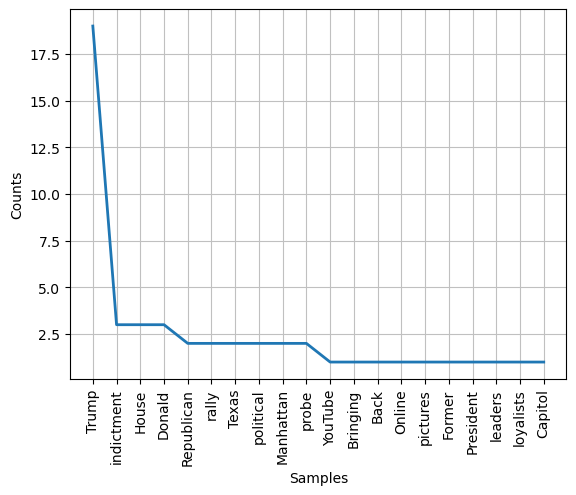

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [80]:
frequency_dist.plot(20,cumulative=False)

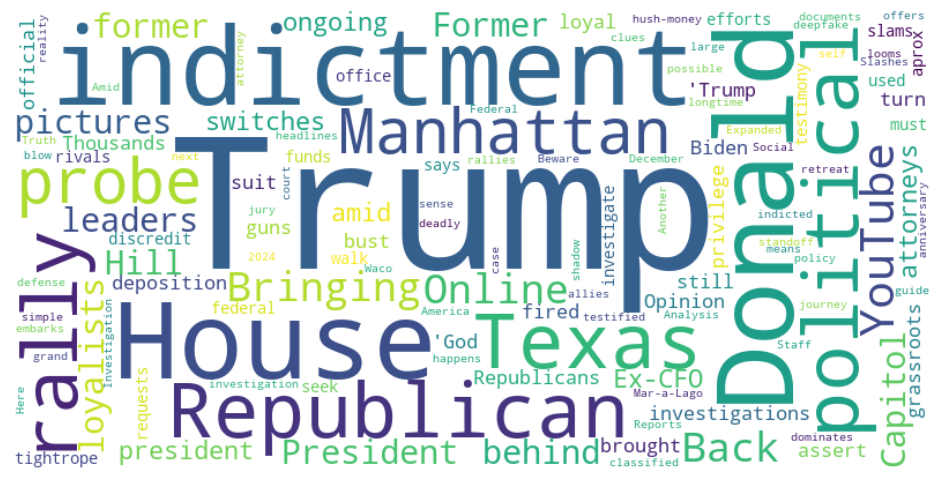

In [81]:

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(frequency_dist)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [82]:
def genism_lsa_model(doc_clean):
    coherences =[]
    co_dict = {}
    bestVal = 0
    bestCoh = 0
    dictionary = corpora.Dictionary(doc_clean)
    term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

    # you can change the number of topics as we want 
    for i in range (1, 10):
        ldamodel = LsiModel(term_matrix, num_topics=i, id2word=dictionary)
        coh_mod = CoherenceModel(model=ldamodel, texts=doc_clean, coherence='c_v')
        coherence = coh_mod.get_coherence()
        co_dict[i] = coherence

        if coherence > bestCoh:
            bestVal = i
            bestCoh = coherence
        coherences.append(coherence)

    # This function returns the best topic (bestVal) based on coherent of all topics and their corresponding coherence score (co_dict)
    return bestVal, co_dict

# This code will print all the coherence score
bestVal, co_dist = genism_lsa_model([filtered_sentence])

In [83]:
# This code will print all the coherence score
print(co_dist)

{1: 0.4096778230870952, 2: 0.45082797942821645, 3: 0.4866537262096924, 4: 0.43511915582167954, 5: 0.4201578862249492, 6: 0.5186556346645129, 7: 0.44496346334724146, 8: 0.5065130939905615, 9: 0.4442630848734915}


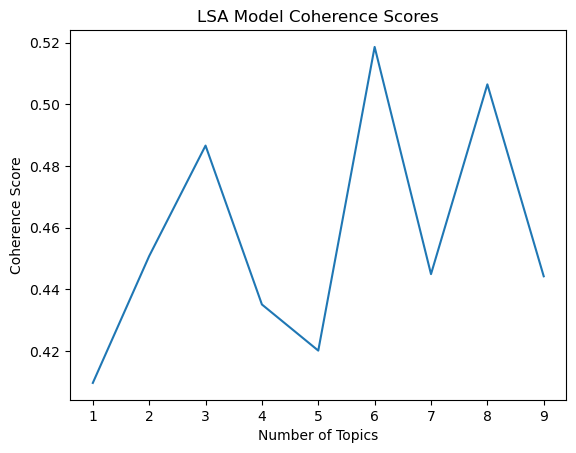

In [92]:
import matplotlib.pyplot as plt

# extract the coherence scores and topic numbers from the dictionary
topic_nums = list(co_dist.keys())
coherences = list(co_dist.values())

# plot the coherence scores as a line graph
plt.plot(topic_nums, coherences)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LSA Model Coherence Scores')
plt.show()


In [93]:
import pandas as pd

coherence_df = pd.DataFrame({'Number of Topics': topic_nums, 'Coherence Score': coherences})
print(coherence_df)


   Number of Topics  Coherence Score
0                 1         0.409678
1                 2         0.450828
2                 3         0.486654
3                 4         0.435119
4                 5         0.420158
5                 6         0.518656
6                 7         0.444963
7                 8         0.506513
8                 9         0.444263


In [94]:
co_dist = {1: 0.4096778230870952, 2: 0.45082797942821645, 3: 0.4866537262096924, 4: 0.43511915582167954, 5: 0.4201578862249492, 6: 0.5186556346645129, 7: 0.44496346334724146, 8: 0.5065130939905615, 9: 0.4442630848734915}

# Calculate the sum of coherence scores
sum_scores = sum(co_dist.values())

# Normalize the coherence scores
normalized_scores = {k: v/sum_scores for k, v in co_dist.items()}

# Calculate the sum of normalized scores to check if it equals 1
sum_normalized_scores = sum(normalized_scores.values())

# Print the normalized scores
for k, v in normalized_scores.items():
    print(f'Topic {k}: {v:.3f}')

# Print the sum of normalized scores
print(f'Sum of normalized scores: {sum_normalized_scores:.3f}')


Topic 1: 0.100
Topic 2: 0.110
Topic 3: 0.118
Topic 4: 0.106
Topic 5: 0.102
Topic 6: 0.126
Topic 7: 0.108
Topic 8: 0.123
Topic 9: 0.108
Sum of normalized scores: 1.000
